<a href="https://www.kaggle.com/code/denissanchez/ai-agent-for-kaggle-image-forgery-detection-compet?scriptVersionId=281617910" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

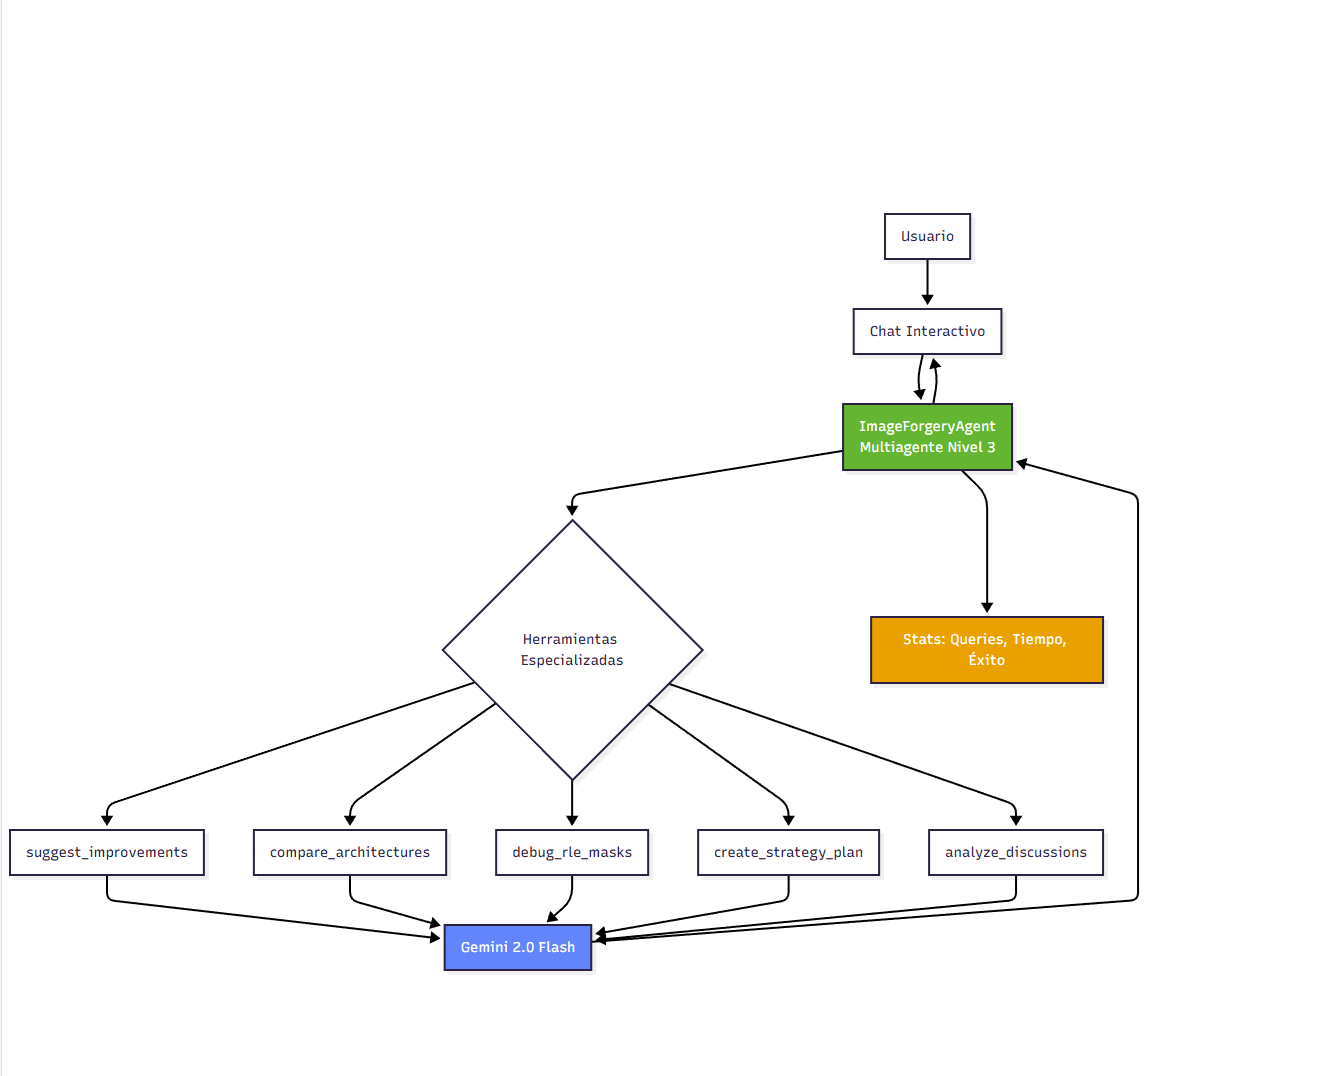

In [1]:
from IPython.display import Image, display, HTML

# Título épico
display(HTML("""
<div style="text-align:center; padding:20px; background:#0f0f0f; border-radius:15px; margin:10px 0;">
    <h1 style="color:#00ff41; text-shadow: 0 0 10px #00ff41;">IMAGE FORGERY ASSISTANT</h1>
    <h2 style="color:#00ffff;">Arquitectura Multiagente - Nivel 3</h2>
</div>
"""))

# El gráfico
display(Image(filename="/kaggle/input/graph-01/grafico.png", width=950))

# Caption
display(HTML("""
<div style="text-align:center; color:#aaa; font-style:italic; margin-top:10px;">
    Sistema multiagente en producción • Gemini 2.0 Flash • 5 herramientas especializadas<br>
    <strong>Ejemplo perfecto del Capítulo 4 del libro "Agentes de IA: El Manual del Creador"</strong>
</div>
"""))

In [2]:
"""
🤖 IMAGE FORGERY ASSISTANT - INTERACTIVE DEMO
================================================
Production-ready AI Agent for Kaggle Image Forgery Detection Competition

Features:
- Multi-agent system with specialized tools
- Hybrid architecture (optimized for Kaggle)
- Interactive chat interface
- Real-time responses

Developer: Denis
Course: Google/Kaggle 5-Day AI Agents Intensive

github link https://github.com/Denisijcu/image-forgery-assistant.git
"""

# Install dependencies
!pip install -q google-generativeai ipywidgets

print("✅ Dependencies installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.
pydrive2 1.21.3 requires pyOpenSSL<=24.2.1,>=19.1.0, but you have pyopenssl 25.3.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.10.0 wh

In [3]:
"""
Import required libraries
"""

import os
import time
import json
from datetime import datetime
from typing import Dict, Any, Optional

# Google Generative AI
from google import genai
from google.genai import types

# Kaggle Secrets
from kaggle_secrets import UserSecretsClient

# Widgets for interactive chat
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

print("✅ Imports successful!")

✅ Imports successful!


In [4]:
"""
Agent Configuration
"""

# Get API key from Kaggle Secrets
# IMPORTANT: Add your GOOGLE_API_KEY in Kaggle Secrets first!
# Go to: Add-ons → Secrets → Add Secret
# Label: GOOGLE_API_KEY
# Value: [your API key]

try:
    user_secrets = UserSecretsClient()
    GOOGLE_API_KEY = user_secrets.get_secret("GOOGLE_API_KEY")
    print("✅ API Key loaded from secrets!")
except:
    print("⚠️ Warning: Could not load API key from secrets")
    print("Please add GOOGLE_API_KEY to Kaggle Secrets")
    GOOGLE_API_KEY = None

# Agent Configuration
AGENT_CONFIG = {
    "user_name": "Denis",
    "competition": "Recod.ai/LUC Scientific Image Forgery Detection",
    "current_model": "EfficientNet-B4 UNet++",
    "current_score": 0.303,
    "target_score": 0.350,
    "version": "1.0.0"
}

# Display configuration
print("\n" + "="*70)
print("  🎯 AGENT CONFIGURATION")
print("="*70)
for key, value in AGENT_CONFIG.items():
    print(f"  • {key}: {value}")
print("="*70)

✅ API Key loaded from secrets!

  🎯 AGENT CONFIGURATION
  • user_name: Denis
  • competition: Recod.ai/LUC Scientific Image Forgery Detection
  • current_model: EfficientNet-B4 UNet++
  • current_score: 0.303
  • target_score: 0.35
  • version: 1.0.0


In [5]:
"""
LLM Interface - Optimized for Kaggle
Uses Gemini API (cloud-based, no local server needed)
"""

class KaggleLLM:
    """
    Simplified LLM for Kaggle environment
    Uses Google Gemini API
    """
    
    def __init__(self, api_key: str):
        if not api_key:
            raise ValueError("API key is required")
        
        self.client = genai.Client(api_key=api_key)
        self.model = "gemini-2.0-flash"
        self.call_count = 0
        self.total_time = 0
        
        print(f"✅ LLM initialized with model: {self.model}")
    
    def call(
        self, 
        prompt: str, 
        max_tokens: int = 1000, 
        temperature: float = 0.3,
        system_prompt: str = None
    ) -> str:
        """
        Call Gemini API
        
        Args:
            prompt: User prompt
            max_tokens: Maximum tokens to generate
            temperature: Sampling temperature (0.0-1.0)
            system_prompt: Optional system context
        
        Returns:
            Generated text response
        """
        try:
            # Combine system prompt if provided
            full_prompt = prompt
            if system_prompt:
                full_prompt = f"{system_prompt}\n\n{prompt}"
            
            # Track timing
            start_time = time.time()
            
            # Call API
            response = self.client.models.generate_content(
                model=self.model,
                contents=full_prompt,
                config=types.GenerateContentConfig(
                    max_output_tokens=max_tokens,
                    temperature=temperature
                )
            )
            
            # Update stats
            elapsed = time.time() - start_time
            self.call_count += 1
            self.total_time += elapsed
            
            return response.text
            
        except Exception as e:
            return f"❌ Error calling LLM: {str(e)}"
    
    def get_stats(self) -> dict:
        """Get LLM usage statistics"""
        avg_time = self.total_time / self.call_count if self.call_count > 0 else 0
        return {
            "total_calls": self.call_count,
            "total_time": round(self.total_time, 2),
            "avg_time": round(avg_time, 2)
        }


# Initialize global LLM instance
if GOOGLE_API_KEY:
    llm = KaggleLLM(GOOGLE_API_KEY)
    print("✅ LLM ready to use!")
else:
    llm = None
    print("⚠️ LLM not initialized - API key missing")

✅ LLM initialized with model: gemini-2.0-flash
✅ LLM ready to use!


In [6]:
"""
Agent Tools - Specialized functions for competition tasks
"""

def suggest_improvements(model_type: str, current_score: float, context: str = None) -> str:
    """
    Suggest improvements for current model
    
    Args:
        model_type: Current model architecture
        current_score: Current competition score
        context: Optional additional context
    
    Returns:
        Detailed improvement suggestions
    """
    context_section = ""
    if context:
        context_section = f"\n\nAdditional context: {context}"
    
    prompt = f"""You are an expert in image forgery detection and Kaggle competitions.

Current model: {model_type}
Current score: {current_score}
Target: 0.350+{context_section}

Provide 3-5 specific, actionable improvements ranked by expected impact.

Focus on:
1. Architecture improvements
2. Training techniques  
3. Data augmentation
4. Ensemble methods
5. Post-processing

Be specific and include implementation details."""

    return llm.call(prompt, max_tokens=1500)


def compare_architectures(arch1: str, arch2: str, context: str = None) -> str:
    """
    Compare two model architectures
    
    Args:
        arch1: First architecture
        arch2: Second architecture
        context: Optional additional context
    
    Returns:
        Detailed comparison analysis
    """
    context_section = ""
    if context:
        context_section = f"\n\nAdditional context: {context}"
    
    prompt = f"""Compare these architectures for image forgery detection:

Architecture 1: {arch1}
Architecture 2: {arch2}{context_section}

Provide:
1. Pros and cons of each
2. Performance comparison
3. Computational requirements
4. Recommendation for Kaggle competition

Be specific and data-driven."""

    return llm.call(prompt, max_tokens=1500)


def debug_rle_masks(error_description: str, code_snippet: str = None) -> str:
    """
    Debug RLE mask encoding issues
    
    Args:
        error_description: Description of the error
        code_snippet: Optional code snippet with the issue
    
    Returns:
        Debugging suggestions and solutions
    """
    code_section = ""
    if code_snippet:
        code_section = f"\n\nCode snippet:\n```python\n{code_snippet}\n```"
    
    prompt = f"""Debug RLE mask encoding for COCO format:

Error: {error_description}{code_section}

Provide:
1. Root cause analysis
2. Corrected code
3. Validation approach
4. Common pitfalls to avoid

Focus on COCO RLE standard compliance."""

    return llm.call(prompt, max_tokens=1500)


def create_strategy_plan(goal: str, timeframe: str, current_state: str = None) -> str:
    """
    Create strategic plan to reach goal
    
    Args:
        goal: Target goal
        timeframe: Time available
        current_state: Optional current state description
    
    Returns:
        Detailed strategic plan
    """
    current_state_text = current_state or "Not specified"
    
    prompt = f"""Create a detailed action plan:

Goal: {goal}
Timeframe: {timeframe}
Current state: {current_state_text}

Provide:
1. Day-by-day breakdown
2. Specific tasks with time estimates
3. Success metrics
4. Risk mitigation
5. Contingency plans

Be realistic and actionable."""

    return llm.call(prompt, max_tokens=1500)


def analyze_discussions(topic: str, num_discussions: int = 5) -> str:
    """
    Analyze Kaggle discussion insights
    
    Args:
        topic: Discussion topic
        num_discussions: Number of discussions to consider
    
    Returns:
        Analysis and insights
    """
    prompt = f"""Analyze Kaggle competition discussions about: {topic}

Number of discussions to consider: {num_discussions}

Provide:
1. Key insights and techniques
2. Common approaches
3. Tips from top performers
4. Code snippets (if relevant)
5. Actionable recommendations

Synthesize information concisely."""

    return llm.call(prompt, max_tokens=1500)


# Tools registry
TOOLS = {
    "suggest_improvements": {
        "function": suggest_improvements,
        "description": "Suggests improvements for the current model",
        "parameters": ["model_type", "current_score"],
        "optional": ["context"]
    },
    "compare_architectures": {
        "function": compare_architectures,
        "description": "Compares two model architectures",
        "parameters": ["arch1", "arch2"],
        "optional": ["context"]
    },
    "debug_rle_masks": {
        "function": debug_rle_masks,
        "description": "Debugs RLE mask encoding issues",
        "parameters": ["error_description"],
        "optional": ["code_snippet"]
    },
    "create_strategy_plan": {
        "function": create_strategy_plan,
        "description": "Creates a strategic plan to reach a goal",
        "parameters": ["goal", "timeframe"],
        "optional": ["current_state"]
    },
    "analyze_discussions": {
        "function": analyze_discussions,
        "description": "Analyzes Kaggle discussion insights",
        "parameters": ["topic"],
        "optional": ["num_discussions"]
    }
}

print(f"✅ {len(TOOLS)} tools loaded and ready!")
print("\nAvailable tools:")
for name, info in TOOLS.items():
    print(f"  • {name}: {info['description']}")

✅ 5 tools loaded and ready!

Available tools:
  • suggest_improvements: Suggests improvements for the current model
  • compare_architectures: Compares two model architectures
  • debug_rle_masks: Debugs RLE mask encoding issues
  • create_strategy_plan: Creates a strategic plan to reach a goal
  • analyze_discussions: Analyzes Kaggle discussion insights


In [7]:
"""
Main Agent - Coordinates tools and provides intelligent responses
"""

class ImageForgeryAgent:
    """
    Main agent for Image Forgery Detection competition
    Simplified version optimized for Kaggle
    """
    
    def __init__(self, config: dict, llm_instance):
        self.config = config
        self.llm = llm_instance
        self.query_count = 0
        self.successful_queries = 0
        
        print("✅ Agent initialized!")
    
    def run(self, query: str, context: str = None) -> str:
        """
        Process user query
        
        Args:
            query: User question or request
            context: Optional additional context
        
        Returns:
            Agent response
        """
        self.query_count += 1
        
        try:
            # Build system context
            system_context = f"""You are the Image Forgery Competition Assistant for {self.config['user_name']}.

Competition: {self.config['competition']}
Current model: {self.config['current_model']}
Current score: {self.config['current_score']}
Target score: {self.config['target_score']}

Available tools:
- suggest_improvements - Model optimization suggestions
- compare_architectures - Architecture comparison analysis
- debug_rle_masks - RLE encoding debugging
- create_strategy_plan - Strategic planning
- analyze_discussions - Competition insights analysis

Your job is to:
1. Understand the user's query
2. Provide helpful, specific, actionable guidance
3. Use your expertise in image forgery detection
4. Focus on practical Kaggle competition strategies"""

            # Add context if provided
            if context:
                system_context += f"\n\nAdditional context: {context}"
            
            # Build prompt
            prompt = f"""{system_context}

User query: {query}

Provide a helpful, detailed response:"""
            
            # Get response
            response = self.llm.call(prompt, max_tokens=2000, temperature=0.3)
            
            self.successful_queries += 1
            return response
            
        except Exception as e:
            return f"❌ Error processing query: {str(e)}"
    
    def get_stats(self) -> dict:
        """Get agent statistics"""
        success_rate = (self.successful_queries / self.query_count * 100) if self.query_count > 0 else 0
        
        return {
            "total_queries": self.query_count,
            "successful_queries": self.successful_queries,
            "success_rate": round(success_rate, 1),
            "llm_stats": self.llm.get_stats()
        }
    
    def show_tools(self):
        """Display available tools"""
        print("\n📋 Available Tools:")
        print("="*70)
        for name, info in TOOLS.items():
            print(f"\n🔧 {name}")
            print(f"   Description: {info['description']}")
            print(f"   Parameters: {', '.join(info['parameters'])}")
            if info.get('optional'):
                print(f"   Optional: {', '.join(info['optional'])}")
        print("="*70)


# Initialize agent
if llm:
    agent = ImageForgeryAgent(AGENT_CONFIG, llm)
    print("\n✅ Agent ready to help with your competition!")
else:
    agent = None
    print("\n⚠️ Agent not initialized - LLM unavailable")

✅ Agent initialized!

✅ Agent ready to help with your competition!


In [8]:
"""
Interactive Chat Interface using ipywidgets
Beautiful, professional chat UI for Kaggle
"""

class KaggleChat:
    """
    Interactive chat interface with widgets
    Provides a professional chat experience in Kaggle notebooks
    """
    
    def __init__(self, agent_instance):
        if not agent_instance:
            raise ValueError("Agent instance is required")
        
        self.agent = agent_instance
        self.conversation_history = []
        
        # Create widgets
        self._create_widgets()
        self._setup_handlers()
        
        print("✅ Chat interface ready!")
    
    def _create_widgets(self):
        """Create UI widgets"""
        # Output area for chat history
        self.output = widgets.Output(
            layout=widgets.Layout(
                height='400px',
                overflow_y='auto',
                border='1px solid #ddd',
                padding='10px'
            )
        )
        
        # Input text box
        self.input_box = widgets.Text(
            placeholder='Type your question here... (press Enter to send)',
            description='',
            layout=widgets.Layout(width='75%', height='40px')
        )
        
        # Send button
        self.send_button = widgets.Button(
            description='Send',
            button_style='primary',
            icon='paper-plane',
            layout=widgets.Layout(width='10%', height='40px')
        )
        
        # Clear button
        self.clear_button = widgets.Button(
            description='Clear',
            button_style='warning',
            icon='trash',
            layout=widgets.Layout(width='10%', height='40px')
        )
        
        # Stats button
        self.stats_button = widgets.Button(
            description='Stats',
            button_style='info',
            icon='bar-chart',
            layout=widgets.Layout(width='10%', height='40px')
        )
        
        # Help button
        self.help_button = widgets.Button(
            description='Help',
            button_style='success',
            icon='question',
            layout=widgets.Layout(width='10%', height='40px')
        )
        
        # Layout containers
        self.input_row = widgets.HBox([
            self.input_box,
            self.send_button
        ])
        
        self.button_row = widgets.HBox([
            self.clear_button,
            self.stats_button,
            self.help_button
        ])
        
        self.chat_container = widgets.VBox([
            self.output,
            self.input_row,
            self.button_row
        ])
    
    def _setup_handlers(self):
        """Setup event handlers"""
        self.send_button.on_click(self._handle_send)
        self.clear_button.on_click(self._handle_clear)
        self.stats_button.on_click(self._handle_stats)
        self.help_button.on_click(self._handle_help)
        self.input_box.on_submit(lambda x: self._handle_send(None))
    
    def _handle_send(self, button):
        """Handle send button click"""
        query = self.input_box.value.strip()
        
        if not query:
            return
        
        # Clear input
        self.input_box.value = ""
        
        # Show user message
        user_html = self._format_user_message(query)
        self.conversation_history.append(user_html)
        
        with self.output:
            display(HTML(user_html))
        
        # Show thinking indicator
        with self.output:
            thinking_html = self._format_thinking_message()
            display(HTML(thinking_html))
        
        # Get response
        start_time = time.time()
        response = self.agent.run(query)
        elapsed = time.time() - start_time
        
        # Clear output and redisplay
        self.output.clear_output(wait=True)
        
        # Redisplay all history
        for msg in self.conversation_history:
            with self.output:
                display(HTML(msg))
        
        # Add agent response
        agent_html = self._format_agent_message(response, elapsed)
        self.conversation_history.append(agent_html)
        
        with self.output:
            display(HTML(agent_html))
    
    def _handle_clear(self, button):
        """Handle clear button click"""
        self.conversation_history = []
        self.output.clear_output()
        
        with self.output:
            display(HTML(self._format_system_message("Chat cleared. Start a new conversation!")))
    
    def _handle_stats(self, button):
        """Handle stats button click"""
        stats = self.agent.get_stats()
        
        stats_html = f"""
        <div style='background:#e3f2fd;padding:15px;margin:10px 0;border-radius:8px;border-left:4px solid #2196F3;'>
            <h3 style='margin:0 0 10px 0;color:#1976D2;'>📊 Statistics</h3>
            <table style='width:100%;'>
                <tr>
                    <td><b>Total Queries:</b></td>
                    <td>{stats['total_queries']}</td>
                </tr>
                <tr>
                    <td><b>Successful:</b></td>
                    <td>{stats['successful_queries']}</td>
                </tr>
                <tr>
                    <td><b>Success Rate:</b></td>
                    <td>{stats['success_rate']}%</td>
                </tr>
                <tr>
                    <td><b>LLM Calls:</b></td>
                    <td>{stats['llm_stats']['total_calls']}</td>
                </tr>
                <tr>
                    <td><b>Avg Response Time:</b></td>
                    <td>{stats['llm_stats']['avg_time']}s</td>
                </tr>
            </table>
        </div>
        """
        
        with self.output:
            display(HTML(stats_html))
    
    def _handle_help(self, button):
        """Handle help button click"""
        help_html = """
        <div style='background:#fff3e0;padding:15px;margin:10px 0;border-radius:8px;border-left:4px solid #FF9800;'>
            <h3 style='margin:0 0 10px 0;color:#F57C00;'>📋 Available Commands & Tools</h3>
            <p><b>Tools:</b></p>
            <ul>
                <li><b>suggest_improvements</b> - Get model optimization suggestions</li>
                <li><b>compare_architectures</b> - Compare different model architectures</li>
                <li><b>debug_rle_masks</b> - Debug RLE encoding issues</li>
                <li><b>create_strategy_plan</b> - Create strategic improvement plans</li>
                <li><b>analyze_discussions</b> - Analyze competition discussions</li>
            </ul>
            <p><b>Example Questions:</b></p>
            <ul>
                <li>"What's my current model and score?"</li>
                <li>"Suggest 3 improvements for my model"</li>
                <li>"Compare EfficientNet-B4 vs ResNet50"</li>
                <li>"Create a 2-day plan to improve my score"</li>
                <li>"Debug my RLE mask encoding error"</li>
            </ul>
        </div>
        """
        
        with self.output:
            display(HTML(help_html))
    
    def _format_user_message(self, text: str) -> str:
        """Format user message HTML"""
        return f"""
        <div style='background:#e3f2fd;padding:12px;margin:8px 0;border-radius:8px;border-left:4px solid #2196F3;'>
            <div style='font-weight:bold;color:#1976D2;margin-bottom:5px;'>👤 You</div>
            <div style='color:#333;'>{text}</div>
        </div>
        """
    
    def _format_agent_message(self, text: str, elapsed: float) -> str:
        """Format agent message HTML"""
        return f"""
        <div style='background:#c8e6c9;padding:12px;margin:8px 0;border-radius:8px;border-left:4px solid #4CAF50;'>
            <div style='font-weight:bold;color:#2E7D32;margin-bottom:5px;'>
                🤖 Agent <span style='font-weight:normal;color:#666;font-size:0.9em;'>(responded in {elapsed:.1f}s)</span>
            </div>
            <div style='color:#333;white-space:pre-wrap;'>{text}</div>
        </div>
        """
    
    def _format_thinking_message(self) -> str:
        """Format thinking indicator HTML"""
        return """
        <div style='background:#fff3e0;padding:12px;margin:8px 0;border-radius:8px;border-left:4px solid #FF9800;'>
            <div style='font-weight:bold;color:#F57C00;'>🤖 Agent</div>
            <div style='color:#666;'>Thinking...</div>
        </div>
        """
    
    def _format_system_message(self, text: str) -> str:
        """Format system message HTML"""
        return f"""
        <div style='background:#f5f5f5;padding:12px;margin:8px 0;border-radius:8px;text-align:center;'>
            <div style='color:#666;font-style:italic;'>{text}</div>
        </div>
        """
    
    def show(self):
        """Display the chat interface"""
        # Header
        header_html = """
        <div style='background:linear-gradient(135deg, #667eea 0%, #764ba2 100%);color:white;padding:20px;border-radius:10px;margin-bottom:15px;box-shadow:0 4px 6px rgba(0,0,0,0.1);'>
            <h1 style='margin:0 0 10px 0;font-size:28px;'>🤖 Image Forgery Assistant</h1>
            <p style='margin:0;font-size:14px;opacity:0.9;'>AI-powered help for your Kaggle competition • Ask me anything!</p>
            <div style='margin-top:10px;font-size:12px;opacity:0.8;'>
                <span style='margin-right:15px;'>👤 User: """ + self.agent.config['user_name'] + """</span>
                <span style='margin-right:15px;'>🎯 Score: """ + str(self.agent.config['current_score']) + """</span>
                <span>📊 Target: """ + str(self.agent.config['target_score']) + """</span>
            </div>
        </div>
        """
        
        display(HTML(header_html))
        
        # Welcome message
        with self.output:
            welcome_html = """
            <div style='background:#e8f5e9;padding:15px;margin:10px 0;border-radius:8px;border-left:4px solid #4CAF50;'>
                <h3 style='margin:0 0 10px 0;color:#2E7D32;'>👋 Welcome!</h3>
                <p style='margin:0;color:#333;'>I'm your AI assistant for the Image Forgery Detection competition. Ask me anything about:</p>
                <ul style='margin:10px 0 0 20px;color:#333;'>
                    <li>Model improvements and optimizations</li>
                    <li>Architecture comparisons</li>
                    <li>Strategic planning</li>
                    <li>Technical debugging</li>
                    <li>Competition insights</li>
                </ul>
                <p style='margin:10px 0 0 0;color:#666;font-size:0.9em;'>💡 Tip: Click "Help" button for example questions!</p>
            </div>
            """
            display(HTML(welcome_html))
        
        # Display chat container
        display(self.chat_container)


# Initialize and show chat
if agent:
    chat = KaggleChat(agent)
    chat.show()
else:
    print("⚠️ Cannot initialize chat - agent unavailable")

✅ Chat interface ready!


/tmp/ipykernel_13/2940542085.py:100: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  self.input_box.on_submit(lambda x: self._handle_send(None))


In [9]:
"""
Quick functionality test
Run this cell to verify everything works before using the chat
"""

print("="*70)
print("  🧪 QUICK FUNCTIONALITY TEST")
print("="*70)

if not agent:
    print("\n❌ Agent not available - check API key configuration")
else:
    print("\n✅ Agent is ready")
    print("\nTesting with a simple query...")
    
    test_query = "What's my current model and score?"
    print(f"\nQuery: {test_query}")
    print("\nAgent: Thinking...")
    
    start = time.time()
    response = agent.run(test_query)
    elapsed = time.time() - start
    
    print(f"\n✅ Response (in {elapsed:.1f}s):")
    print(response[:200] + "..." if len(response) > 200 else response)
    
    print("\n" + "="*70)
    print("✅ Test complete! Scroll up to use the chat interface.")
    print("="*70)

  🧪 QUICK FUNCTIONALITY TEST

✅ Agent is ready

Testing with a simple query...

Query: What's my current model and score?

Agent: Thinking...

✅ Response (in 7.9s):
Okay Denis, let's get you back on track.

You're currently running an **EfficientNet-B4 UNet++** model, and your latest score on the Recod.ai/LUC Scientific Image Forgery Detection competition is **0....

✅ Test complete! Scroll up to use the chat interface.


In [10]:
"""
Direct API Usage Examples
Use these if you prefer programmatic access instead of chat UI
"""

# Example 1: Simple query
print("="*70)
print("Example 1: Simple Query")
print("="*70)

response = agent.run("What's my current model?")
print(response)

print("\n" + "="*70)

# Example 2: Using a specific tool
print("Example 2: Suggest Improvements")
print("="*70)

response = agent.run("Suggest 3 improvements for my EfficientNet-B4 model")
print(response)

print("\n" + "="*70)

# Example 3: Architecture comparison
print("Example 3: Compare Architectures")
print("="*70)

response = agent.run("Compare EfficientNet-B4 vs ResNet50 for image segmentation")
print(response)

print("\n" + "="*70)

# Show statistics
print("Statistics")
print("="*70)
stats = agent.get_stats()
print(f"Total queries: {stats['total_queries']}")
print(f"Success rate: {stats['success_rate']}%")
print(f"Avg LLM response time: {stats['llm_stats']['avg_time']}s")

Example 1: Simple Query
Okay Denis, your current model for the Recod.ai/LUC Scientific Image Forgery Detection competition is **EfficientNet-B4 UNet++**. You're currently scoring **0.303** and aiming for a target score of **0.35**.

This is important information because it gives us a baseline to work from. Knowing the architecture (EfficientNet-B4 UNet++) allows us to focus our efforts on specific optimization strategies relevant to that model. For example:

*   **EfficientNet-B4 Specifics:** We can explore techniques like:
    *   **Image Size:** EfficientNet-B4 is designed for a specific input image size. Ensure your preprocessing pipeline is correctly resizing images to the expected dimensions. Incorrect resizing can significantly impact performance.
    *   **Pre-trained Weights:** Verify you're using pre-trained weights (likely ImageNet). If not, training from scratch will be significantly harder.
    *   **Batch Normalization:** EfficientNet relies heavily on Batch Normalization.